In [1]:
#import depend
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
#create and read file
vax_file = './Resources/country_vaccinations.csv'

main_csv = pd.read_csv(vax_file)

main_csv.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [3]:
#fills NaN with 0
vax_csv_0 = main_csv.fillna(0)
#convert 'date' to datetime
vax_csv_0['date']= pd.to_datetime(vax_csv_0['date'])
#aggregates data by month and country and performs max and average as required
vax_csv = vax_csv_0.groupby(['country',pd.Grouper(key='date',freq='M')]).aggregate({'total_vaccinations':np.max,
                                                                                      'people_vaccinated':np.max,
                                                                                      'people_fully_vaccinated':np.max,
                                                                                      'daily_vaccinations_raw':np.average,
                                                                                      'daily_vaccinations':np.average,
                                                                                      'total_vaccinations_per_hundred':np.max,
                                                                                      'people_vaccinated_per_hundred':np.max,
                                                                                      'people_fully_vaccinated_per_hundred':np.max,
                                                                                      'daily_vaccinations_per_million':np.average,
                                                                                    })
#reset index
vax_csv = vax_csv.reset_index()

#rename columns
vax_csv = vax_csv.rename(columns={'daily_vaccinations':'average_daily_vaccinations',
                                      'daily_vaccinations_per_million':'average_daily_vaccinations_per_million'})

vax_csv['date'] = pd.DatetimeIndex(vax_csv['date']).strftime('%m-%Y')

#display dataframe
vax_csv.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,average_daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,average_daily_vaccinations_per_million
0,Afghanistan,02-2021,8200.0,8200.0,0.0,0.000000,1171.714286,0.02,0.02,0.00,29.142857
1,Afghanistan,03-2021,54000.0,54000.0,0.0,0.000000,2770.774194,0.14,0.14,0.00,69.483871
2,Afghanistan,04-2021,240000.0,240000.0,0.0,0.000000,7320.200000,0.60,0.60,0.00,183.700000
3,Afghanistan,05-2021,600152.0,480226.0,119926.0,92.225806,9220.580645,1.51,1.21,0.30,231.322581
4,Afghanistan,06-2021,886854.0,699200.0,187654.0,133.833333,8096.633333,2.23,1.76,0.47,203.233333


In [4]:
#creates a summary dataframe that gives the final/total values for the data set
totals = vax_csv.groupby('country').aggregate({'total_vaccinations':np.max,                                                                                  
                                               'people_vaccinated':np.max,
                                               'people_fully_vaccinated':np.max,
                                               'daily_vaccinations_raw':np.average,
                                               'average_daily_vaccinations':np.average,
                                               'total_vaccinations_per_hundred':np.max,
                                               'people_vaccinated_per_hundred':np.max,
                                               'people_fully_vaccinated_per_hundred':np.max,
                                               'average_daily_vaccinations_per_million':np.average,})
totals['number of vaccines available']=vax_csv_0['vaccines'].str.count(',').add(1).groupby(vax_csv_0.country).max()
totals.head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,average_daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,average_daily_vaccinations_per_million,number of vaccines available
country,,,,,,,,,,
Afghanistan,5228706.0,4397449.0,3566192.0,22.605914,17779.442994,13.13,11.04,8.95,446.279758,4
Albania,2166207.0,1092316.0,982658.0,3956.972571,6272.566054,75.40,38.02,34.20,2183.286407,4
Algeria,12293060.0,6875003.0,5391232.0,518.351515,36317.677587,27.55,15.41,12.08,813.838402,4
Andorra,106428.0,56095.0,50333.0,13.338889,297.700077,137.59,72.52,65.07,3848.483897,3
Angola,10319552.0,7003795.0,3315757.0,0.000000,38835.826559,30.41,20.64,9.77,1144.471470,1


In [5]:
#displays 5 countries with the highest percantage of people vaccinated
print('Top 5 countries by percentage of people fully vaccinated')
print(totals['people_fully_vaccinated_per_hundred'].nlargest(5))

Top 5 countries by percentage of people fully vaccinated
country
Gibraltar               118.34
Pitcairn                100.00
United Arab Emirates     90.18
Portugal                 88.69
Singapore                87.00
Name: people_fully_vaccinated_per_hundred, dtype: float64


In [6]:
#displays 5 countries with the lowest percantage of people vaccinated
print('Bottom 5 countries by percentage of people fully vaccinated')
print(totals['people_fully_vaccinated_per_hundred'].nsmallest(5))

Bottom 5 countries by percentage of people fully vaccinated
country
Burundi                         0.01
Democratic Republic of Congo    0.07
Chad                            0.45
Haiti                           0.58
Guinea-Bissau                   1.00
Name: people_fully_vaccinated_per_hundred, dtype: float64


In [7]:
#summary statistics of the varities of vaccines
print(totals['number of vaccines available'].describe())
print(totals['number of vaccines available'].mode())

count    223.000000
mean       3.224215
std        1.595022
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: number of vaccines available, dtype: float64
0    4
dtype: int64


In [8]:
#find upper and lower bound of vaccines available
iqr = 4 - 2
lower_bound = 2 -(1.5*iqr)
upper_bound = 4 +(1.5*iqr)
print(lower_bound)
print(upper_bound)

-1.0
7.0


In [9]:
#excluding outliers, finds the countries with the most vaccine varities available
maxvax = totals.loc[totals['number of vaccines available']==7].index
maxvalue = totals['number of vaccines available'].max()
print(f'The maximum number of available vaccines is {maxvalue}')
print(f'Thre are {len(maxvax)} countries with this number available')
print(list(maxvax))

The maximum number of available vaccines is 8
Thre are 8 countries with this number available
['Laos', 'Libya', 'Mexico', 'Nicaragua', 'Paraguay', 'Philippines', 'Rwanda', 'Tunisia']


In [10]:
minvax = totals.loc[totals['number of vaccines available']==1].index
minvalue = totals['number of vaccines available'].min()
print(f'The minimum number of available vaccines is {minvalue}')
print(f'Thre are {len(minvax)} countries with this number available')
print(list(minvax))

The minimum number of available vaccines is 1
Thre are 36 countries with this number available
['Angola', 'Aruba', 'Burundi', 'Chad', 'Cook Islands', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Ethiopia', 'Falkland Islands', 'Fiji', 'Gibraltar', 'Greenland', 'Guinea', 'Kiribati', 'Liberia', 'Mali', 'Monaco', 'Montserrat', 'Nauru', 'New Caledonia', 'Nigeria', 'Niue', 'Papua New Guinea', 'Pitcairn', 'Saint Helena', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Solomon Islands', 'Togo', 'Tokelau', 'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna']


In [11]:
#find the countries with the most vaccine varities available including outliers
outliers = totals.loc[totals['number of vaccines available']==totals['number of vaccines available'].max()].index
outliervalue = totals['number of vaccines available'].max()
print(f'Including outliers the maximum number of available vaccines is {maxvalue}')
print(f'Thre are {len(maxvax)} countries with this number available')
print(list(maxvax))

Including outliers the maximum number of available vaccines is 8
Thre are 8 countries with this number available
['Laos', 'Libya', 'Mexico', 'Nicaragua', 'Paraguay', 'Philippines', 'Rwanda', 'Tunisia']


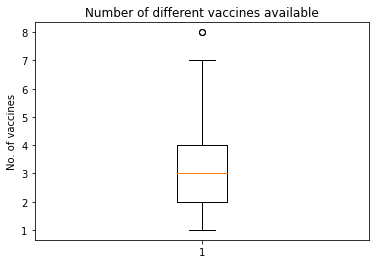

In [12]:
#boxplot showing the spread of vaccines available
plt.boxplot(totals['number of vaccines available'])
plt.title('Number of different vaccines available')
plt.ylabel('No. of vaccines')

plt.savefig('./Output/Manufacturer_Box')

Text(0.5, 1.0, 'Types of Vaccine available vs Total Vaccinations Per Hundred People ')

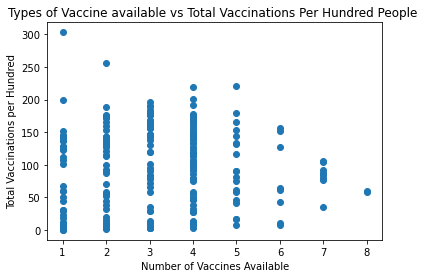

In [13]:
#scatter plot of Varieties of vaccines available vs total number of vaccinations in a country
x_values = totals['number of vaccines available']
y_values = totals['total_vaccinations_per_hundred']

plt.scatter(x_values,y_values)
plt.xlabel('Number of Vaccines Available')
plt.ylabel('Total Vaccinations per Hundred')
plt.title('Types of Vaccine available vs Total Vaccinations Per Hundred People ')

The r-squared is: 0.00011094771205505523


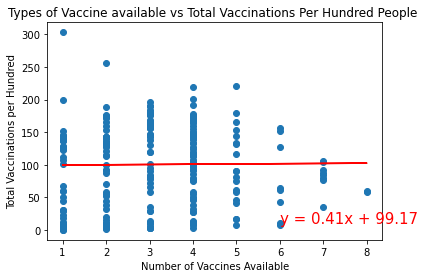

In [14]:
#above chart with correlation and line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Number of Vaccines Available')
plt.ylabel('Total Vaccinations per Hundred')
plt.title('Types of Vaccine available vs Total Vaccinations Per Hundred People ')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Output/Country_Vacciniations_Scatter')

In [15]:
#read vaccinations by manufacturer file
vaccines_file = './Resources/vaccinations-by-manufacturer.csv'
vaxman_df = pd.read_csv(vaccines_file)
#drop eropean union to stop european countries being counted twice
vaxman_df = vaxman_df.loc[vaxman_df['location']!= 'European Union']

In [16]:
#creates a dataframe to show the totals
grpvax_df = vaxman_df.groupby(['location','vaccine'])

vax_max = grpvax_df.max()

vax_max = vax_max.reset_index()

vax_max = vax_max.drop('date',1)

vax_max.head()



,location,vaccine,total_vaccinations
0,Austria,Johnson&Johnson,350090
1,Austria,Moderna,1434420
2,Austria,Oxford/AstraZeneca,1580438
3,Austria,Pfizer/BioNTech,11899678
4,Belgium,Johnson&Johnson,412183


In [17]:
#Shows how many countries from the data source each vaccine is available in
print(len(vax_max['location'].unique()))
print(vax_max['vaccine'].value_counts().sort_index())

39
CanSino                2
Johnson&Johnson       32
Moderna               34
Oxford/AstraZeneca    34
Pfizer/BioNTech       39
Sinopharm/Beijing      3
Sinovac                6
Sputnik V              2
Name: vaccine, dtype: int64


In [18]:
man_df = vax_max.groupby('vaccine').max()

man_df = man_df.reset_index()
man_df = man_df.drop('location',1)

man_df

,vaccine,total_vaccinations
0,CanSino,573569
1,Johnson&Johnson,17484608
2,Moderna,190503920
3,Oxford/AstraZeneca,22221186
4,Pfizer/BioNTech,290516041
5,Sinopharm/Beijing,17991059
6,Sinovac,24290027
7,Sputnik V,1807392


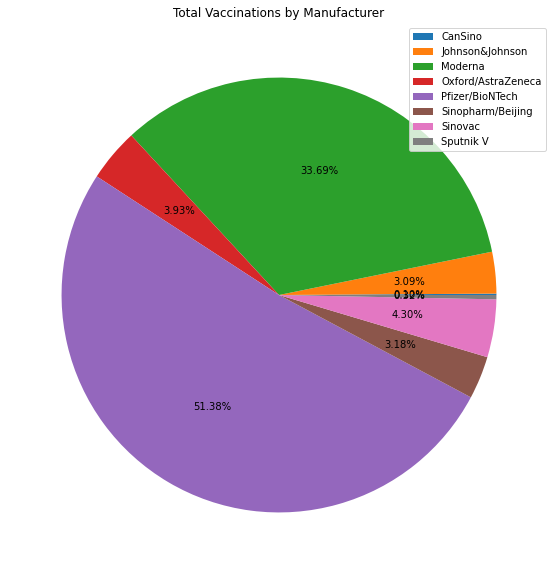

In [19]:
#pie chart showing the distribution of
labels = man_df['vaccine']
values = man_df['total_vaccinations']
plt.figure(figsize = (10, 10))
plt.pie(values, autopct='%.2f%%')
plt.title('Total Vaccinations by Manufacturer')
plt.legend(labels=labels)
plt.savefig('./Output/Manufacturer_Pie')

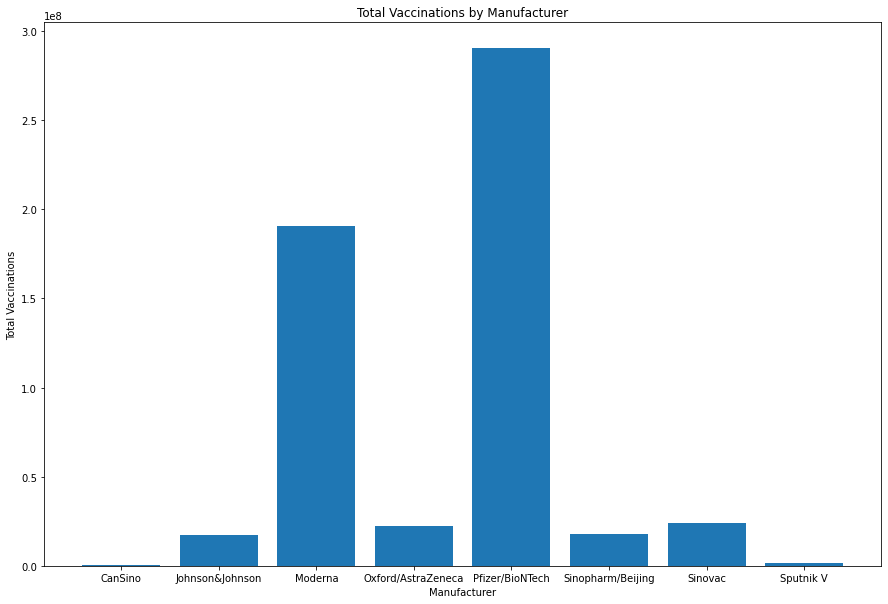

In [20]:
#alternate visualisation of the above as a bar chart
xaxis = man_df['vaccine']
yaxis = man_df['total_vaccinations']
plt.figure(figsize = (15, 10))
plt.bar(xaxis, yaxis)
plt.title('Total Vaccinations by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Total Vaccinations')
plt.savefig('./Output/Manufacturer_Bar')

The r-squared is: 0.44202473645176255


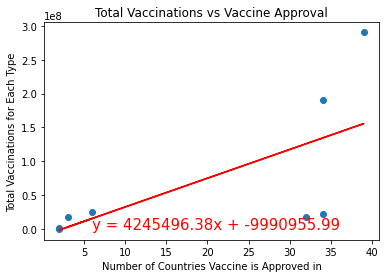

In [21]:
#scatter plot showing number of countries a vaccine is available in versus total vaccinations administered of that vaccine
xaxis = vax_max['vaccine'].value_counts().sort_index()
plt.scatter(xaxis,yaxis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(xaxis,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Number of Countries Vaccine is Approved in')
plt.ylabel('Total Vaccinations for Each Type')
plt.title('Total Vaccinations vs Vaccine Approval')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./Output/Vaccines_Approval_Scatter')